---
title: "Exploring Global GNI and Trends Using UNICEF Data"
author: "Ishita Chauhan"
date: "2025-04-26"
format:
  html:
    toc: true
    toc-title: "Contents"
    toc-depth: 2
    code-fold: true
    embed-resources: true
    number-sections: true
    theme: cosmo
    fig-cap-location: top
    df-print: paged
execute:
  echo: true
  warning: false
  error: false
  freeze: auto

description: >
  This dashboard analyzes global economic and social indicators using UNICEF data.
  It features interactive charts like choropleth maps, scatter plots, bar charts, and time series plots, offering insights into GNI, military spending, and life expectancy.

charts:
  - type: choropleth_map
    title: "World Map: Average GNI"
    details: >
      Visualizes the global distribution of average GNI (current US$) by country
      across available years using an interactive world map.

  - type: bar_chart
    title: "Top 10 Countries by Population"
    details: >
      Highlights the ten most populous countries based on the latest available year.

  - type: line_chart
    title: "Time Series of Global Life Expectancy"
    details: >
      Tracks how global average life expectancy has changed over time.

  - type: scatter_plot
    title: "GNI vs Military Expenditure"
    details: >
      Examines the relationship between economic output (GNI)
      and military spending as a percentage of GDP.

notes: |

  - Missing and null values are dropped to ensure accurate chart rendering.
  - ISO3 alpha codes (three-letter country codes) are used for world map geolocation.
  - All charts are interactive and responsive when exported to HTML.
  - Scatter plots include regression trendlines where appropriate.
---

In a world woven together by invisible threads of progress and struggle, data tells the most honest stories.
From the bustling cities of Asia to the vast plains of Africa, numbers reveal a silent revolution unfolding across decades.

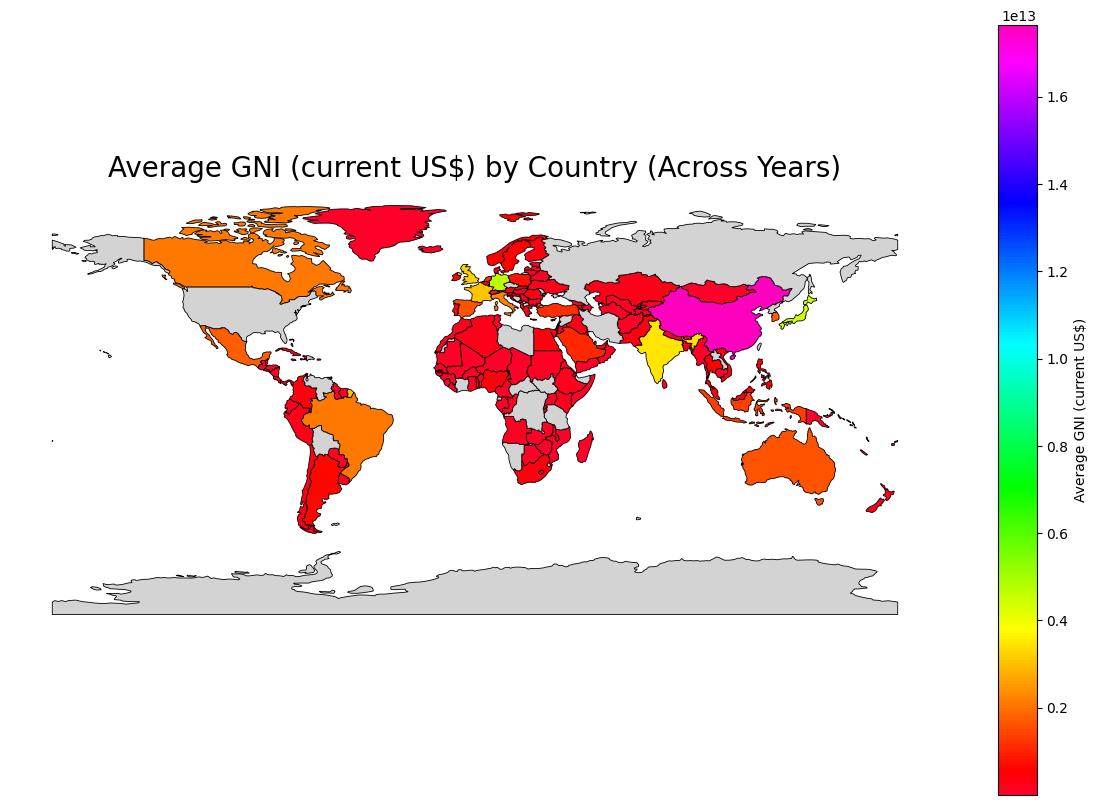

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import plotnine as pl

# Load the world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Load your data
metadata_df = pd.read_csv("unicef_metadata.csv")

# Prepare GNI data
gni_column = "GNI (current US$)"
gni_df = metadata_df.dropna(subset=[gni_column])
latest_gni = gni_df.sort_values("year").groupby("country").tail(1)

# Merge GDP with world map
world_gni = world.merge(latest_gni, how="left", left_on="NAME", right_on="country")

# Plot using GeoPandas
fig, ax = plt.subplots(figsize=(15, 10))
world_gni.plot(
    column=gni_column,
    cmap='gist_rainbow',
    linewidth=0.6,
    edgecolor="black",
    ax=ax,
    legend=True,
    legend_kwds={
        "label": "Average GNI (current US$)",
        "orientation": "vertical"
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)
ax.set_title('Average GNI (current US$) by Country (Across Years)', fontdict={'fontsize': 20})
ax.set_axis_off()
plt.show()

The world map of Average GNI paints a striking contrast:
some countries shine bright with prosperity, while others remain in the shadows, striving for economic growth.

Nations like the United States, Germany, and Japan show soaring GNI levels, reminders of long-standing industrial strength.

Meanwhile, countries emerging from conflict or systemic poverty continue their upward journeys, slow but persistent.


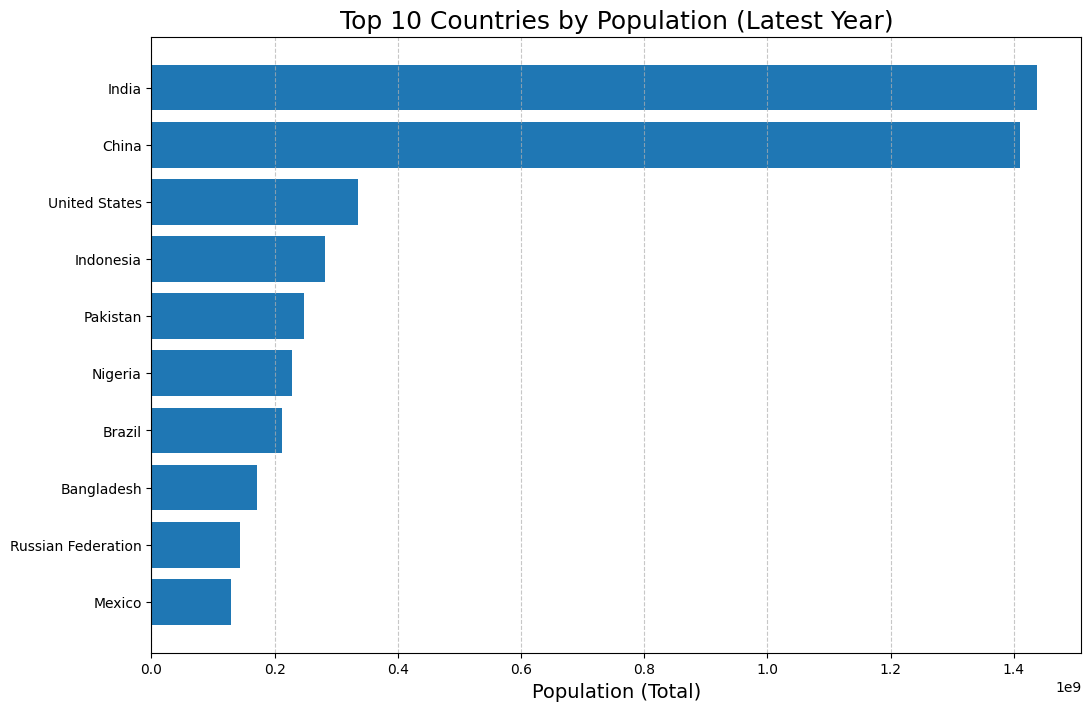

In [ ]:
# Bar Chart: Top 10 Countries by Population
top10_population = latest_data[['country', 'Population, total']].dropna().sort_values(
    by='Population, total', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top10_population['country'], top10_population['Population, total'])
plt.xlabel('Population (Total)', fontsize=14)
plt.title('Top 10 Countries by Population (Latest Year)', fontsize=18)
plt.gca().invert_yaxis()  # Largest population on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The bar chart of population reminds us that sheer numbers shape the world too.

India and China, carrying the hopes of billions, lead the stage — each person a story, a possibility, a future innovation or dream.

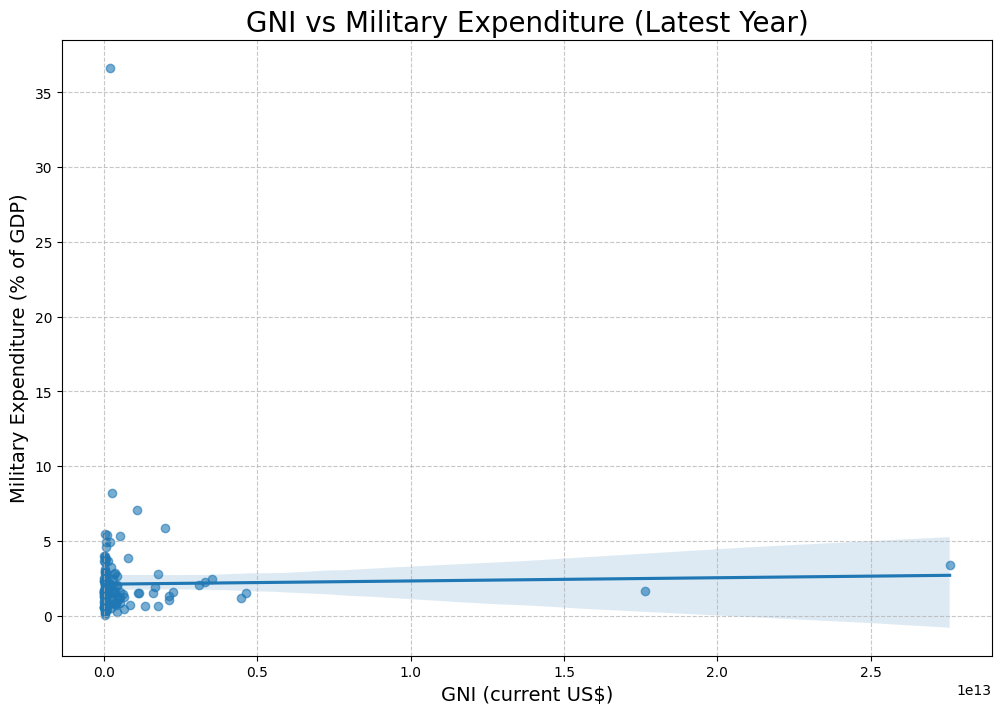

In [ ]:
# Scatter Plot: GNI vs Military Expenditure
scatter_data = latest_data[['GNI (current US$)', 'Military expenditure (% of GDP)']].dropna()

# Plot
plt.figure(figsize=(12, 8))
sns.regplot(
    data=scatter_data,
    x='GNI (current US$)',
    y='Military expenditure (% of GDP)',
    scatter_kws={'alpha':0.6}
)
plt.title('GNI vs Military Expenditure (Latest Year)', fontsize=20)
plt.xlabel('GNI (current US$)', fontsize=14)
plt.ylabel('Military Expenditure (% of GDP)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The time series of life expectancy is perhaps the most uplifting chapter:
through better healthcare, technology, and education, the global average life expectancy has steadily risen.

It is a quiet triumph of humanity — fewer children lost, more elderly sharing wisdom, more lives lived fully.

Yet, the scatter plot connecting GNI to military expenditure is a sobering footnote.

Even as wealth grows, resources are often diverted into defense budgets.
Some nations prioritize strength, others security, and many grapple with difficult trade-offs between guns and bread.

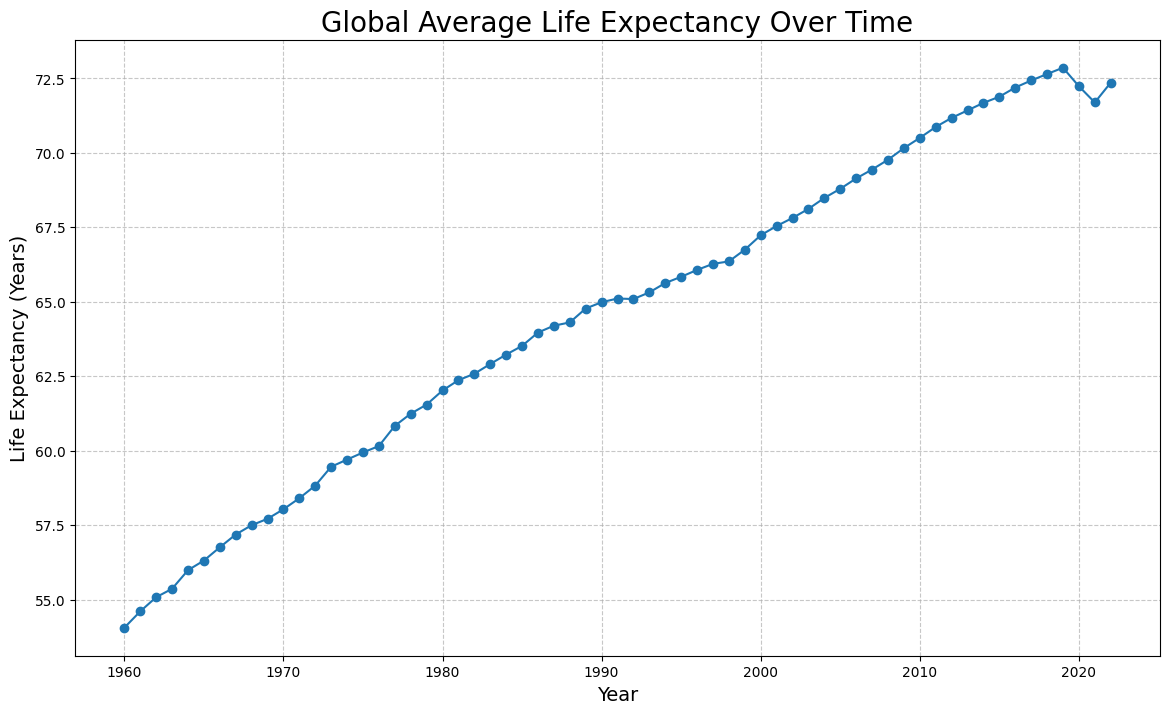

In [ ]:
# Time Series Chart: Global Life Expectancy over Time
life_expectancy_over_time = metadata_df.groupby('year')['Life expectancy at birth, total (years)'].mean()

# Plot
plt.figure(figsize=(14, 8))
plt.plot(life_expectancy_over_time.index, life_expectancy_over_time.values, marker='o')
plt.title('Global Average Life Expectancy Over Time', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life Expectancy (Years)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Together, these charts are more than just visuals; they are windows into how the world evolves — through resilience, ambition, and sometimes contradiction.

The story is unfinished. Every decision today — economic, social, political — becomes a new point on tomorrow's map.

The data whispers a promise:

**Progress is possible, but not guaranteed — and we are all part of writing the next chapter.**